<a href="https://colab.research.google.com/github/Anspire/Anspire.github.io/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import all the necessary files!

In [0]:
import os
import numpy as np
from google.colab import drive

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from keras.preprocessing import image

%matplotlib inline

Using TensorFlow backend.


## Mount Google Drive 

In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
## Verify training directory
!ls '/content/drive/My Drive/Image_2/Input/Dataset/train'

'category 1'  'category 2'  'category 3'  'category 4'	 _DS_Store


### Define training Directory 

In [0]:
train_dir = os.path.join('/content/drive/My Drive/Image_2/Input/Dataset/train')

See what the filenames of every category look like in training directories:

In [0]:
train_category1_names = os.listdir(train_dir + '/category 1')
print(train_category1_names[:10])

train_category2_names = os.listdir(train_dir + '/category 2')
print(train_category2_names[:10])

train_category3_names = os.listdir(train_dir + '/category 3')
print(train_category3_names[:10])

train_category4_names = os.listdir(train_dir + '/category 4')
print(train_category4_names[:10])

['category 1_original_1011.png_877f76ee-04f0-4a57-ab10-654870149261.png', 'category 1_original_1031.png_7973318b-bdce-4cef-a43b-d5ce3d0e9ef7.png', 'category 1_original_1020.png_7344b337-4bd9-4325-a23d-2ba6de3669df.png', 'category 1_original_1011.png_89e5e981-b425-48c9-bc86-2f643df44bae.png', 'category 1_original_1023.png_b6c0487b-176b-4f54-82aa-46eb2129c886.png', 'category 1_original_1030.png_0962f760-4b26-46d1-bf20-dfd0592fc3b7.png', 'category 1_original_1012.png_6ba21c39-58e4-4794-a744-efeaf7f6b921.png', 'category 1_original_1032.png_0566d1d1-03c4-451b-89a5-cfdef90d3e35.png', 'category 1_original_1042.png_e1806a26-6cf1-444d-9c48-ee73e54747f8.png', 'category 1_original_1013.png_8f7e3555-2d36-4697-8e14-6303966ca0f4.png']
['category 2_original_6020.png_08c79930-ce80-44a1-a013-df9642ad55ee.png', 'category 2_original_6013.png_514ece40-30dc-4ff4-9dc8-b7ed142872ac.png', 'category 2_original_6040.png_9e6cca66-a1a9-4b63-b58b-0ca9cfdbc287.png', 'category 2_original_6013.png_e3704583-20cf-4985-

Let's find out the total number of images in the category:

In [0]:
print('total training category 1 images:', len(os.listdir(train_dir + '/category 1')))
print('total training category 2 images:', len(os.listdir(train_dir + '/category 2')))
print('total training category 3 images:', len(os.listdir(train_dir + '/category 3')))
print('total training category 4 images:', len(os.listdir(train_dir + '/category 4')))

total training category 1 images: 103
total training category 2 images: 107
total training category 3 images: 112
total training category 4 images: 119


 Let's take a look at a few pictures of every category to get a better sense of what they look like:

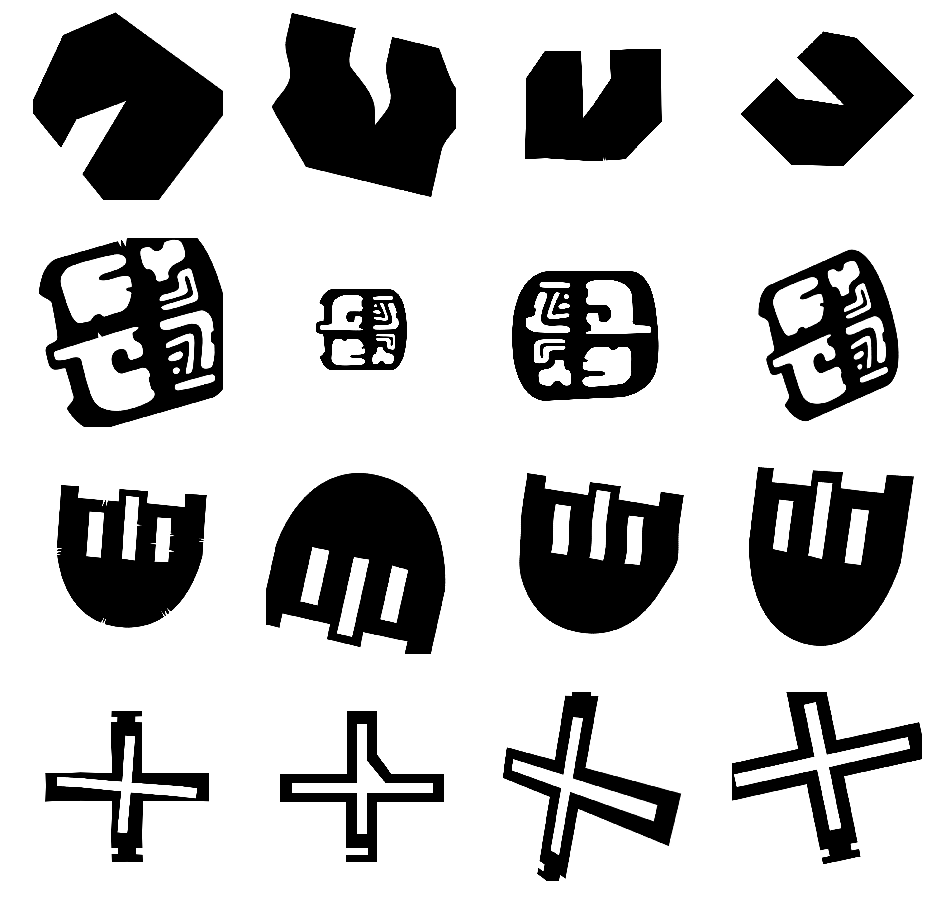

In [0]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 4
next_category1_pix = [os.path.join(train_dir + '/category 1', fname) 
                for fname in train_category1_names[pic_index-4:pic_index]]
next_category2_pix = [os.path.join(train_dir + '/category 2', fname) 
                for fname in train_category2_names[pic_index-4:pic_index]]
next_category3_pix = [os.path.join(train_dir + '/category 3', fname) 
                for fname in train_category3_names[pic_index-4:pic_index]]
next_category4_pix = [os.path.join(train_dir + '/category 4', fname) 
                for fname in train_category4_names[pic_index-4:pic_index]]

for i, img_path in enumerate(next_category1_pix+next_category2_pix+next_category3_pix+next_category4_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Building a Small Model from Scratch

In [0]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    # Input shape is of the image 256x256 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2)                                                 ,
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    # 4 output neuron.
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()

W0805 00:58:17.115121 140396695586688 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

Configure the specifications for model training.Train model with the **categorical_crossentropy** loss, because it's a multi-class classification problem and final activation is a **softmax**.   Use the **adam** optimizer.

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

##Data Preprocessing

In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory).

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255,
                                   horizontal_flip = True,
                                   #rotation_range=20,
                                   #width_shift_range=0.2,
                                   #height_shift_range=0.2,
                                   validation_split=0.2) # set validation split

# Flow training images in batches of 64 using train_.title('Training and validation accuracy')datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(256, 256),  # All images will be resized to 256 x 256
        batch_size=64,
        shuffle = True,
        class_mode='categorical', # Since we use categorical_crossentropy loss, we need categorical labels
        subset='training') # set as training data

# Flow validation images in batches of 16 using train_datagen generator
validation_generator =  train_datagen.flow_from_directory( 
        train_dir,
        batch_size  = 16,
        shuffle = True,
        class_mode  = 'categorical',  # Since we use categorical_crossentropy loss, we need categorical labels
        target_size = (256, 256), # All images will be resized to 256 x 256
        subset='validation') # set as validation data

Found 354 images belonging to 4 classes.
Found 86 images belonging to 4 classes.


## Training

Let's train for 30 epochs

In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch = train_generator.samples // train_generator.batch_size,
      validation_data = validation_generator, 
      validation_steps = validation_generator.samples // validation_generator.batch_size, 
      epochs=24,
      verbose=1)

Epoch 1/24
5/5 [==============================] - 6s 1s/step - loss: 1.0068 - acc: 0.5844 - val_loss: 1.2649 - val_acc: 0.3625
Epoch 2/24
5/5 [==============================] - 5s 901ms/step - loss: 0.5001 - acc: 0.8462 - val_loss: 1.1594 - val_acc: 0.4125
Epoch 3/24
5/5 [==============================] - 4s 870ms/step - loss: 0.3378 - acc: 0.9000 - val_loss: 1.1531 - val_acc: 0.5375
Epoch 4/24
5/5 [==============================] - 4s 819ms/step - loss: 0.3457 - acc: 0.8690 - val_loss: 1.0587 - val_acc: 0.4875
Epoch 5/24
5/5 [==============================] - 4s 827ms/step - loss: 0.2470 - acc: 0.9414 - val_loss: 0.8859 - val_acc: 0.6750
Epoch 6/24
5/5 [==============================] - 4s 783ms/step - loss: 0.1529 - acc: 0.9414 - val_loss: 1.0213 - val_acc: 0.5750
Epoch 7/24
5/5 [==============================] - 4s 803ms/step - loss: 0.1489 - acc: 0.9586 - val_loss: 0.8317 - val_acc: 0.7625
Epoch 8/24
5/5 [==============================] - 4s 883ms/step - loss: 0.0959 - acc: 0.9690 

## Visualize Training/Validation Loss/Accuracy

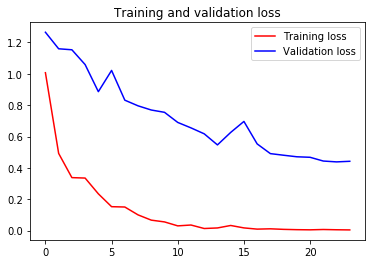

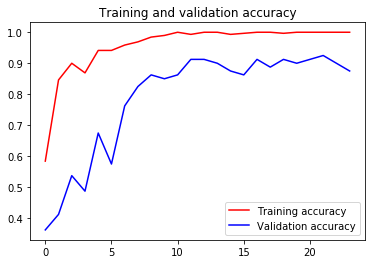

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

## Running the Model

Let's now take a look at actually running a prediction using the model. This code will allow to read files from test directory, and run them through the model, giving an indication of category.

total test images: 30
Test_original_C052.png_5c226e55-09ba-4fd0-bf6b-e0d2b411baa3.png


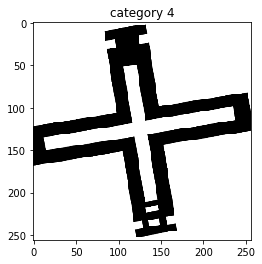

4050.png


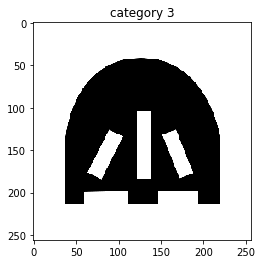

C052.png


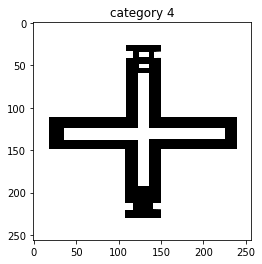

Test_original_4043.png_615f9058-5c5c-4430-9f11-debd66f8a19a.png


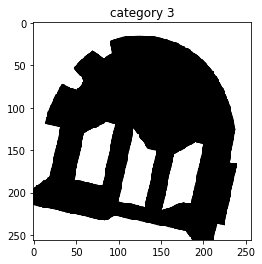

Test_original_4052.png_78b7cca7-2a16-4f3c-829d-e4937b5f2dc2.png


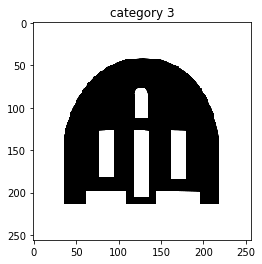

1052.png


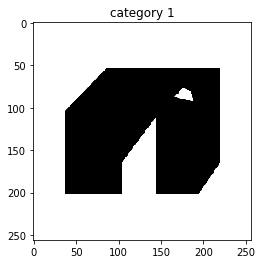

4051.png


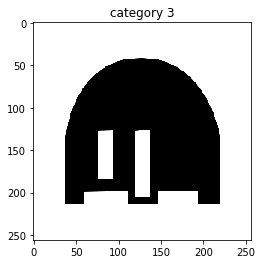

Test_original_4052.png_209d62b3-92ce-4e4d-8006-cf63a40088a4.png


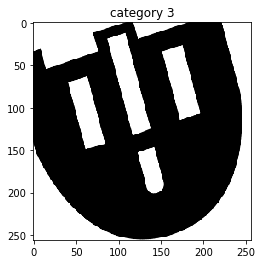

Test_original_6052.png_9950e35a-38c7-4388-b391-ce50bb8ea1a7.png


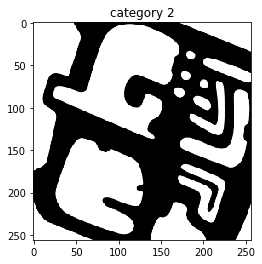

4043.png


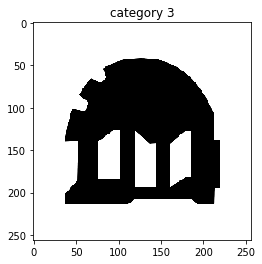

Test_original_C053.png_84d8e7c9-490f-4579-b9a9-501a8ca02cfe.png


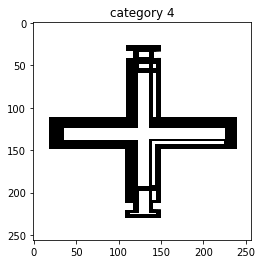

Test_original_4052.png_a2ba34f8-9e8b-4b2d-ad89-612c261a9654.png


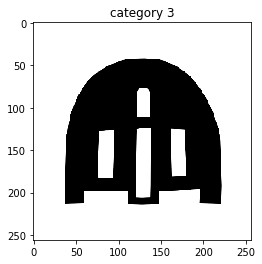

C053.png


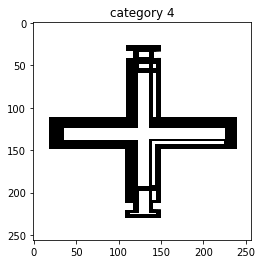

Test_original_6053.png_c34c8352-0830-4853-81ce-3ea5ecf82313.png


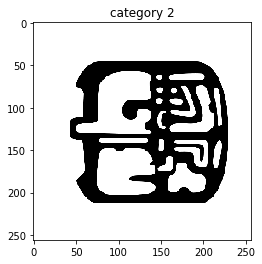

Test_original_1052.png_b95bc311-bae0-48a7-8b9f-d0eddf1ddf2b.png


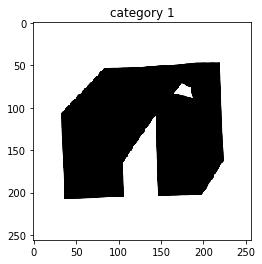

Test_original_4043.png_fffcbc29-3aff-40c0-bdf9-2c12fa6df60b.png


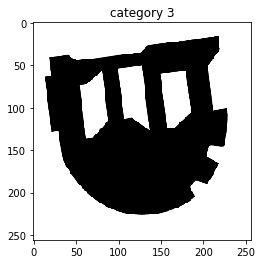

Test_original_4051.png_b90a2ba4-87c6-41e6-ad67-0e0d2e83478c.png


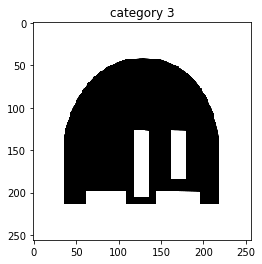

1051.png


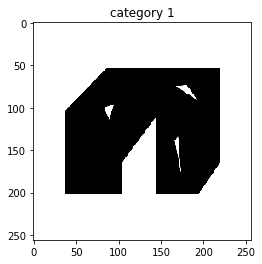

Test_original_6053.png_445dbbe1-4b09-4d56-aede-ab1695664ead.png


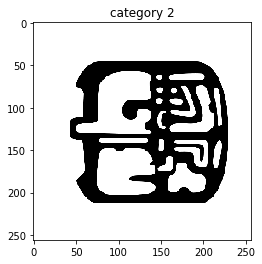

Test_original_6052.png_51c87ecf-ede6-4152-960f-4d56ff913d53.png


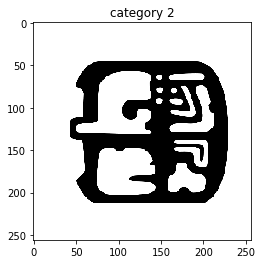

4052.png


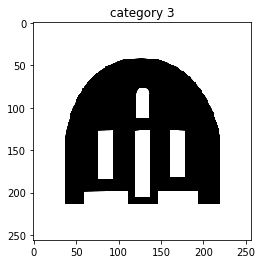

6052.png


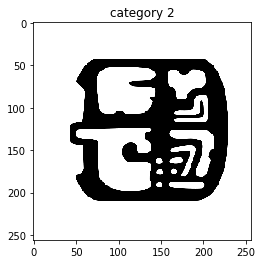

Test_original_C053.png_e7d20702-793e-4207-b174-a8042c05ac3d.png


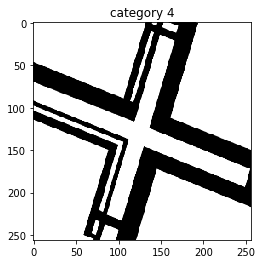

Test_original_1051.png_271f7fb1-f0ab-4ca7-9dae-a352fd0ed8b9.png


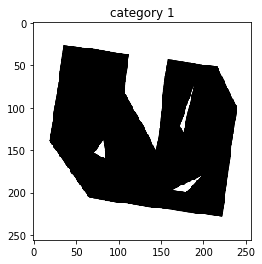

Test_original_6052.png_25bb57e2-b542-47c3-9abb-a1f7c7179ee6.png


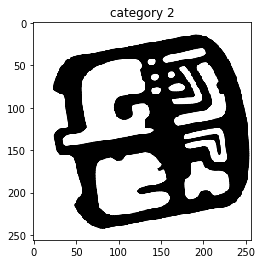

Test_original_1052.png_22a82512-5b1f-4072-a4af-9a8af40653f0.png


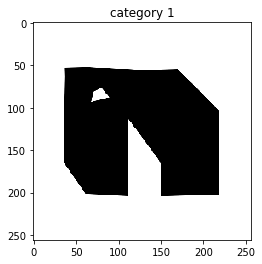

Test_original_6053.png_62171105-bdaa-4eb5-b5e7-9b0fb7914715.png


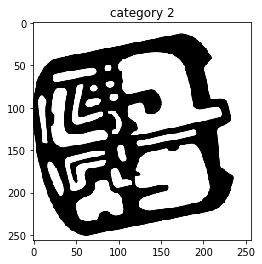

6053.png


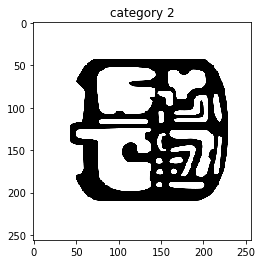

Test_original_4052.png_31cd9a66-9edc-4445-b4bc-9b0239b342e0.png


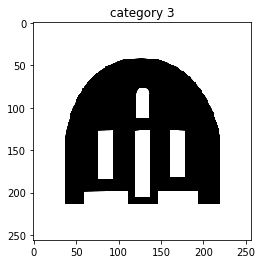

Test_original_6053.png_16f2063e-9590-4ae5-b7f9-7f23c8cfa654.png


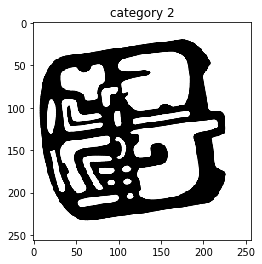

In [0]:
test_dir = os.path.join('/content/drive/My Drive/Image_2/Input/Dataset/test')

test_img_names = os.listdir(test_dir)
print('total test images:', len(test_img_names))

for fn in test_img_names:
 
  # predicting images
  path = os.path.join(test_dir, fn)
  img = image.load_img(path, target_size=(256, 256))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  #print(x)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  plt.imshow(img)
  if classes[0][0] > 0.5:
      plt.title('category 1')
  elif classes[0][1] > 0.5:
      plt.title('category 2')
  elif classes[0][2] > 0.5:
      plt.title('category 3')
  elif classes[0][3] > 0.5:
      plt.title('category 4')
  plt.show()